## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading datasets

In [2]:
df_train = pd.read_csv("flight_data.csv")
df_test = pd.read_csv("flight_test.csv")

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.shape

(10683, 11)

In [5]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df_test.shape

(2671, 10)

In [7]:
# Merge the train and test data
df = df_train.append(df_test, sort=False)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [8]:
df.shape

(13354, 11)

In [9]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


## Data Analysis

In [10]:
# Check the numbers of each airlines
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

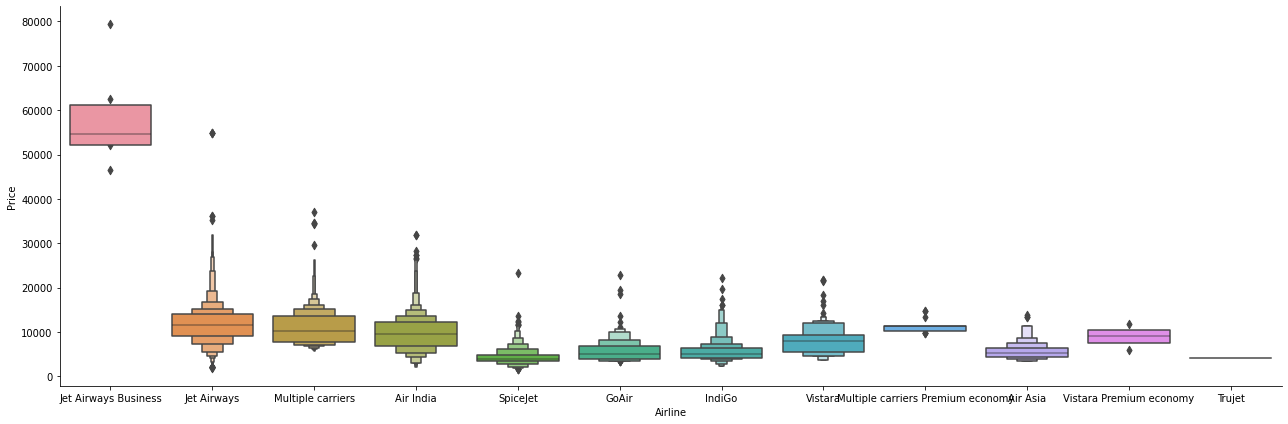

In [11]:
sns.catplot(y="Price", x="Airline", data=df_train.sort_values('Price', ascending=False), kind="boxen", height=6, aspect=3)
plt.show

In [12]:
# Check the departure/source of flights
df_train["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

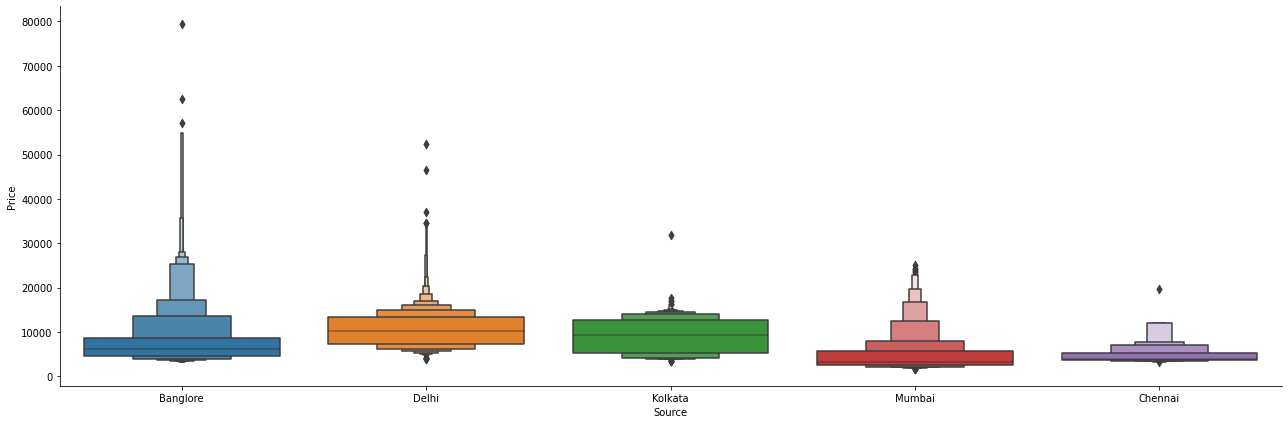

In [13]:
sns.catplot(y="Price", x="Source", data=df_train.sort_values("Price", ascending=False), kind="boxen", height=6, aspect=3)
plt.show

In [14]:
# Check the arrival/destination of flights
df_train["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [15]:
# Check the duration of flights
df_train["Duration"].value_counts().sum()

10683

## Feature Engineering

In [16]:
df["Date"] = df["Date_of_Journey"].str.split("/").str[0]
df["Month"] = df["Date_of_Journey"].str.split("/").str[1]
df["Year"] = df["Date_of_Journey"].str.split("/").str[2]

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [18]:
df = df.drop(["Date_of_Journey"], axis=1)

In [19]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [20]:
df["Date"] = df["Date"].astype(int)
df["Month"] = df["Month"].astype(int)
df["Year"] = df["Year"].astype(int)

In [21]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [22]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [23]:
df["Additional_Info"].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

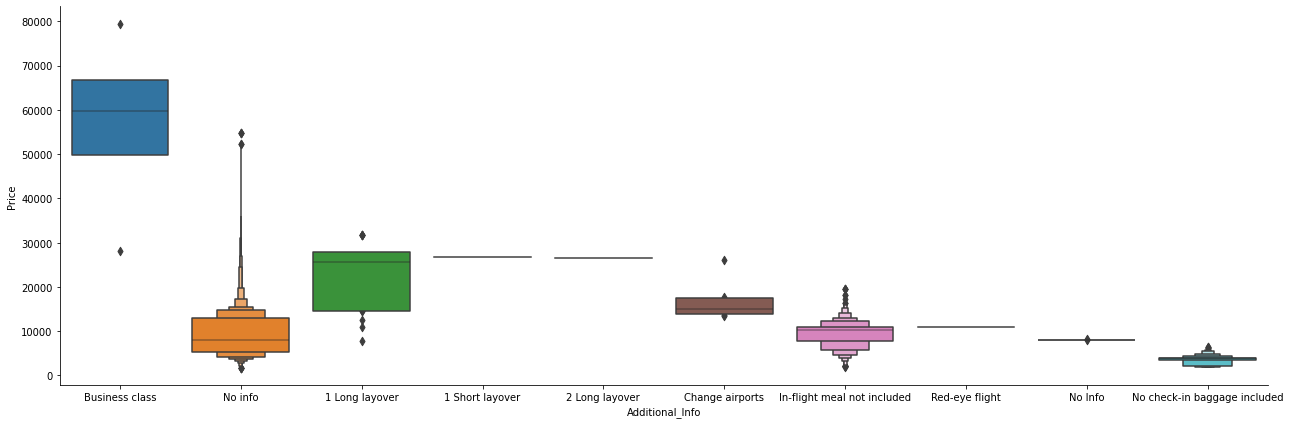

In [24]:
sns.catplot(y="Price", x="Additional_Info", data=df_train.sort_values("Price", ascending=False), kind="boxen", height=6, aspect=3)
plt.show

## Filtering the Arrival Time

In [25]:
df["Arrival_Time"] = df["Arrival_Time"].str.split(' ').str[0]
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [26]:
df["Total_Stops"].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [27]:
df["Total_Stops"] = df["Total_Stops"].fillna('1 stop')

In [28]:
df["Total_Stops"].isnull().sum()

0

In [29]:
df["Total_Stops"] = df["Total_Stops"].replace("non-stop", "0 stop")

In [30]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [31]:
df["Stop"] = df["Total_Stops"].str.split(' ').str[0]

In [32]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [33]:
df = df.drop(["Total_Stops"], axis=1)

In [34]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [35]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stop                object
dtype: object

In [36]:
df["Stop"]= df["Stop"].astype(int)

In [37]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stop                 int32
dtype: object

## Convert all the features to numerical value

In [38]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [39]:
df["Arrival_Hour"] = df["Arrival_Time"].str.split(':').str[0]
df["Arrival_Minute"] = df["Arrival_Time"].str.split(':').str[1]

In [40]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [41]:
df["Arrival_Hour"] = df["Arrival_Hour"].astype(int)
df["Arrival_Minute"] = df["Arrival_Minute"].astype(int)
df = df.drop(["Arrival_Time"], axis=1)

In [42]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [43]:
df["Departure_Hour"] = df["Dep_Time"].str.split(':').str[0]
df["Departure_Minute"] = df["Dep_Time"].str.split(':').str[1]

In [44]:
df["Departure_Hour"] = df["Departure_Hour"].astype(int)
df["Departure_Minute"] = df["Departure_Minute"].astype(int)
df = df.drop(["Dep_Time"], axis=1)

In [45]:
df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


## Divide the route into different columns

In [46]:
df["Route_1"] = df["Route"].str.split('→').str[0]
df["Route_2"] = df["Route"].str.split('→').str[1]
df["Route_3"] = df["Route"].str.split('→').str[2]
df["Route_4"] = df["Route"].str.split('→').str[3]
df["Route_5"] = df["Route"].str.split('→').str[4]

In [47]:
df["Route_1"].fillna("None", inplace=True)
df["Route_2"].fillna("None", inplace=True)
df["Route_3"].fillna("None", inplace=True)
df["Route_4"].fillna("None", inplace=True)
df["Route_5"].fillna("None", inplace=True)

In [48]:
df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [49]:
df = df.drop(["Route"], axis=1)
df = df.drop(["Duration"], axis=1)
df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [50]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Stop                   0
Arrival_Hour           0
Arrival_Minute         0
Departure_Hour         0
Departure_Minute       0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
dtype: int64

## Deal with the price

In [51]:
df["Price"].fillna((df["Price"].mean()), inplace=True)

In [52]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [53]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


## Label Encoder

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()

In [56]:
df["Airline"] = le.fit_transform(df["Airline"])
df["Source"] = le.fit_transform(df["Source"])
df["Destination"] = le.fit_transform(df["Destination"])
df["Additional_Info"] = le.fit_transform(df["Additional_Info"])
df["Route_1"] = le.fit_transform(df["Route_1"])
df["Route_2"] = le.fit_transform(df["Route_2"])
df["Route_3"] = le.fit_transform(df["Route_3"])
df["Route_4"] = le.fit_transform(df["Route_4"])
df["Route_5"] = le.fit_transform(df["Route_5"])

In [57]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,30,13,5
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,5
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,5
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,13,5
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,13,5


In [58]:
# Dropping the year column(same year data)
df = df.drop(["Year"], axis=1)

In [59]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,0,1,10,22,20,0,13,30,13,5
1,1,3,0,8,7662.0,1,5,2,13,15,5,50,2,25,1,3,5
2,4,2,1,8,13882.0,9,6,2,4,25,9,25,3,32,4,5,5
3,3,3,0,8,6218.0,12,5,1,23,30,18,5,2,34,3,13,5
4,3,0,5,8,13302.0,1,3,1,21,35,16,50,0,34,8,13,5


## Feature Selection

In [60]:
x = df.drop(["Price"], axis=1)
y = df["Price"]

In [61]:
x.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,24,3,0,1,10,22,20,0,13,30,13,5
1,1,3,0,8,1,5,2,13,15,5,50,2,25,1,3,5
2,4,2,1,8,9,6,2,4,25,9,25,3,32,4,5,5
3,3,3,0,8,12,5,1,23,30,18,5,2,34,3,13,5
4,3,0,5,8,1,3,1,21,35,16,50,0,34,8,13,5


In [62]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [63]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [66]:
model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [67]:
model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [68]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [70]:
selected_features = x_train.columns[(model.get_support())]
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [71]:
from sklearn.ensemble import ExtraTreesRegressor

In [72]:
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)

ExtraTreesRegressor()

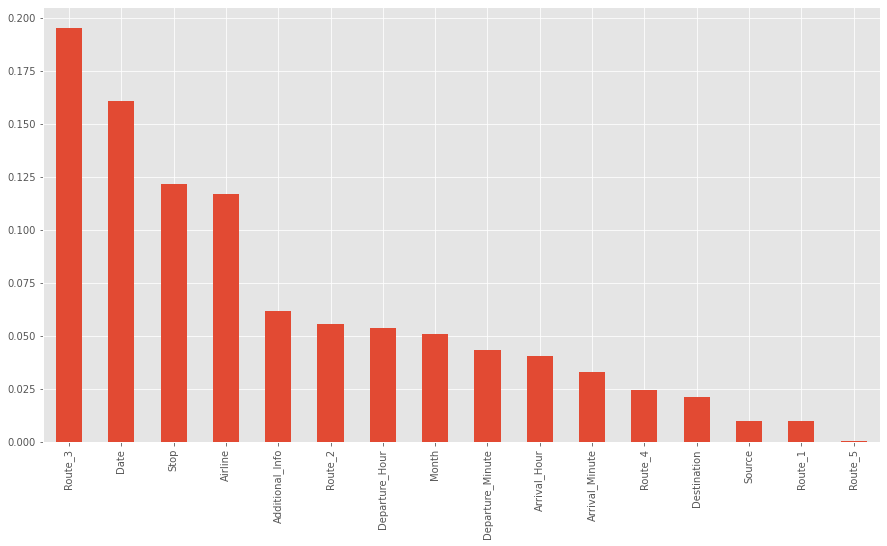

In [74]:
plt.style.use("ggplot")
plt.figure(figsize=(15,8))
feature_importances = pd.Series(etr.feature_importances_, index=x.columns)
feature_importances.nlargest(35).plot(kind="bar")
plt.show()

## Importing the model

In [75]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [76]:
y_pred = reg_rf.predict(x_test)

In [78]:
reg_rf.score(x_train, y_train)

0.9485950594900767

In [79]:
reg_rf.score(x_test, y_test)

0.6223168183214927

c:\Users\madhu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


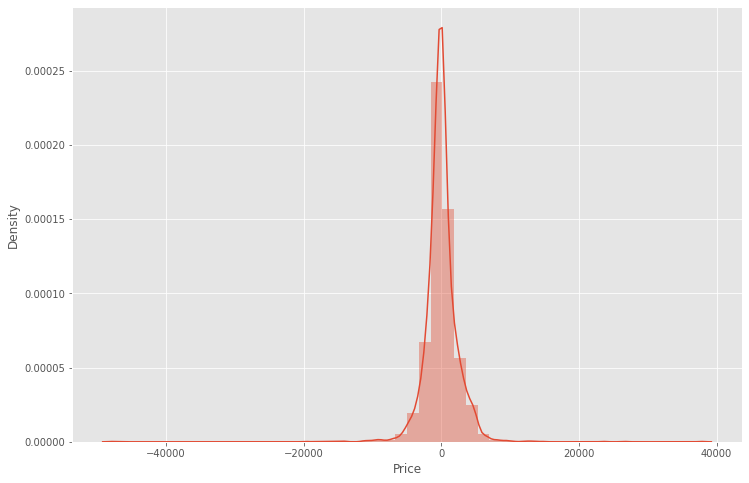

In [81]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test - y_pred)
plt.show()

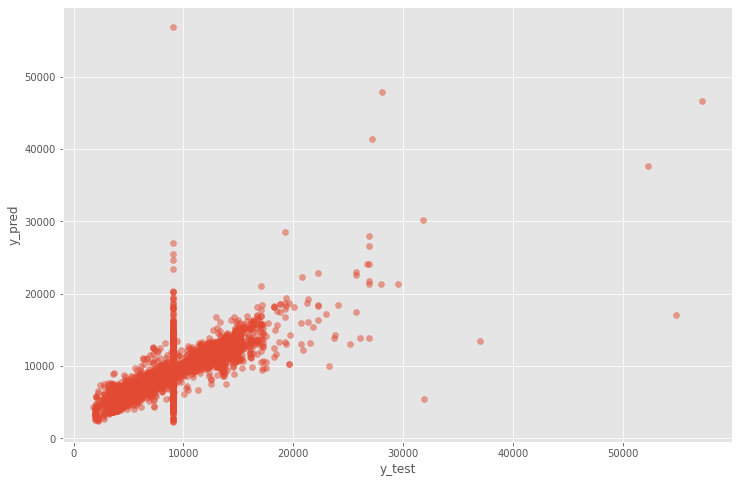

In [82]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [84]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 1528.6961376383001
MSE: 6279283.601866158
RMSE: 2505.849876163007


In [85]:
metrics.r2_score(y_test, y_pred)

0.6223168183214927

## Hypertuning the Model

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1500, num=15)]
max_features = ["auto", "sqrt"]
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
min_samples_split = [2,3,5,7,10,15,100]
min_samples_leaf = [1,2,3,5,8,10]

In [88]:
param_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
               "min_samples_split": min_samples_split,
               "min_samples_leaf": min_samples_leaf}

In [91]:
rf_random = RandomizedSearchCV(estimator=reg_rf, 
                               param_distributions=param_grid, 
                               scoring="neg_mean_squared_error", 
                               n_iter=50, 
                               cv=5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs=3)

In [92]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=3,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10],
                                        'min_samples_split': [2, 3, 5, 7, 10,
                                                              15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [93]:
rf_random.best_params_

{'n_estimators': 1300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'}

In [94]:
reg_rf = RandomForestRegressor(n_estimators=700,
                               min_samples_split=3,
                               min_samples_leaf=1,
                               max_features="sqrt",
                               max_depth=15)

In [95]:
reg_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=3,
                      n_estimators=700)

In [96]:
ypred1 = reg_rf.predict(x_test)
ypred1

array([10264.24340903,  9036.98390357,  8754.10187855, ...,
        4422.9181619 ,  7906.27627014,  9975.64138179])

c:\Users\madhu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


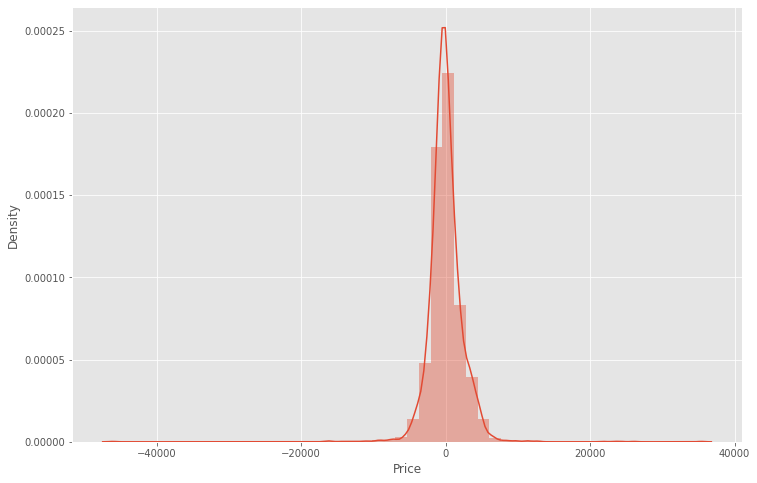

In [97]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test - ypred1)
plt.show()

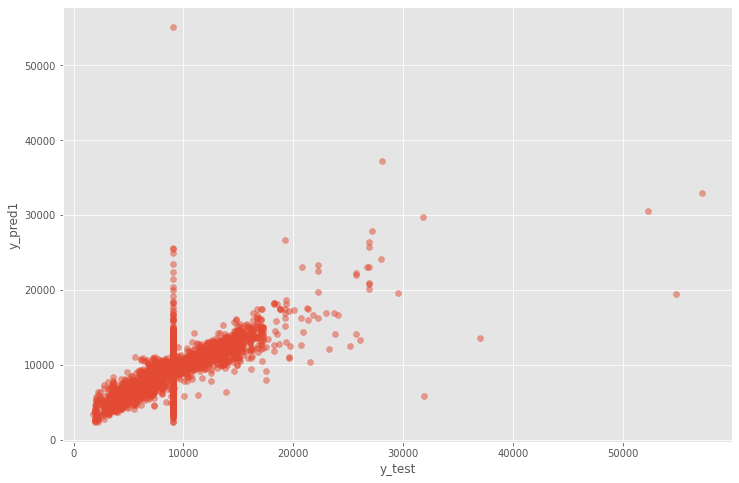

In [98]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, ypred1, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred1")
plt.show()

In [100]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, ypred1))
print("MSE:", metrics.mean_squared_error(y_test, ypred1))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ypred1)))

MAE: 1557.2889238462512
MSE: 6055897.374825277
RMSE: 2460.873295158708
